<a href="https://colab.research.google.com/github/littlecapa/datascience/blob/master/My_TensorFlow_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Installing TensorFlow
To install TensorFlow on your local machine you can use pip.
```console
pip install tensorflow
```

![alt text](https://)If you have a CUDA enabled GPU you can install the GPU version of TensorFlow. You will also need to install some other software which can be found here: https://www.tensorflow.org/install/gpu 
```console
pip install tensorflow-gpu
```

## Importing TensorFlow
The first step here is going to be to select the correct version of TensorFlow from within collabratory!


In [ ]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

import sys

print(tf.version)  # make sure the version is 2.x
print(sys.version_info)

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.6/dist-packages/tensorflow/_api/v2/version/__init__.py'>
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)


## Daten laden

In [3]:
# Load dataset.
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

## Daten auswerten

In [6]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [7]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [8]:
dftrain.shape

(627, 9)

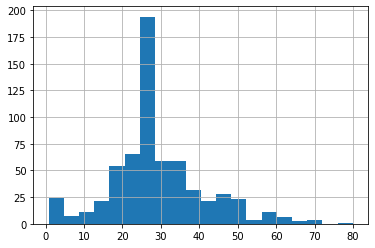

In [9]:
dftrain.age.hist(bins=20)

## Daten kategorisieren

- Numerische Daten werden übernommen
- Für nicht nummerische Daten werden die Unique Werte gesucht

In [42]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()  # gets a list of all unique values from given feature column
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))


for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

##Input Funktion

In [43]:
def make_input_fn(data_df, label_df, num_epochs=15, shuffle=True, batch_size=32):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use

train_input_fn = make_input_fn(dftrain, y_train)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)


##Model erstellen

In [44]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpdri48yt9', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


##Model trainieren

In [47]:
linear_est.train(train_input_fn)  # train


INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpdri48yt9/model.ckpt-300
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 300...
INFO:tensorflow:Saving checkpoints for 300 into /tmp/tmpdri48yt9/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 300...
INFO:tensorflow:loss = 0.34832662, step = 300
INFO:tensorflow:global_step/sec: 315.326
INFO:tensorflow:loss = 0.4840269, step = 400 (0.319 sec)
INFO:tensorflow:global_step/sec: 710.711
INFO:tensorflow:loss = 0.4397037, step = 500 (0.140 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 600...
INFO:tensorflow:Saving checkpoints for 600 into /tmp/tmpdri48yt9/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 600...
INFO:tensorflow:Loss 

##Model evaluieren

In [50]:
result = linear_est.evaluate(eval_input_fn)  # get model metrics/stats by testing on tetsing data
print (result)

INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-01-23T16:49:51Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpdri48yt9/model.ckpt-600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.61508s
INFO:tensorflow:Finished evaluation at 2021-01-23-16:49:52
INFO:tensorflow:Saving dict for global step 600: accuracy = 0.7765151, accuracy_baseline = 0.625, auc = 0.82243645, auc_precision_recall = 0.7778601, average_loss = 0.49355668, global_step = 600, label/mean = 0.375, loss = 0.48194396, precision = 0.74390244, prediction/mean = 0.33314142, recall = 0.61616164
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 600: /tmp/tmpdri48yt9/model.ckpt-600
{'accuracy': 0.7765151, 'accuracy_baseline': 0.625, 'auc': 0.82243645, 'auc_precision_recall': 0.7778601, 'average_loss': 0.49355668, 'label/mean': 0.375, 'loss': 0.48194396, 'precision': 0.74390

##Predict

In [73]:
result = list(linear_est.predict(eval_input_fn))
i=0
right = 0
for r in result:
  print (r['probabilities'][1], y_eval[i])
  if (r['probabilities'][1] <0.5):
    if y_eval[i]==0:
      right += 1
  else:
    if y_eval[i]==1:
      right += 1
  i += 1

print (right)

INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpdri48yt9/model.ckpt-600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.059881438 0
0.25924864 0
0.6348704 1
0.55741924 1
0.22819915 1
0.76141196 1
0.41817442 0
0.09465942 0
0.59289324 0
0.73506576 1
0.6689162 1
0.09489478 0
0.85714316 1
0.32480553 0
0.8510086 1
0.35219997 0
0.12660748 0
0.8370292 1
0.20042722 1
0.073017634 0
0.09792672 0
0.065834045 0
0.67186964 1
0.054261543 0
0.68778443 0
0.47837964 0
0.07583717 0
0.11945392 0
0.19774853 1
0.83728737 1
0.102594405 0
0.7508174 1
0.16183417 0
0.6415412 1
0.19692835 0
0.078157954 1
0.11259969 0
0.09565519 0
0.8099512 1
0.07065742 0
0.6823197 1
0.08539444 1
0.25501522 0
0.22714765 0
0.12929255 0
0.84207016 1
0.094777025 0
0.2267321 0
0.34142426 1
0.27689967 0
0.07659071 0
0.19275023 0
0.045689177 0
0.06888944 0
0.104160994 1
0.08680741 0
0.13923615 0
0.90959036 1
0.1524587 0
0

In [67]:
y_eval.head
print (y_eval[0])

0
